## Interview status prediction

In [ ]:
# Importing packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Ignoring the warings
import warnings
warnings.filterwarnings("ignore")

In [38]:
# disply the maximum columns 
pd.options.display.max_columns = None

In [39]:
#Loading the dataset
data_Train = pd.read_csv("train_IA_-_train.csv")
data_Train.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,6.913030e+11,2.655774e+09,194,Developer,0.98,0.02,53,88,93,32,88,106,41,66,42,47,13,15,6,Neutral,Neutral,98,37,No,Yes,Yes,Consider
1,9.214326e+11,7.123846e+08,234,Sales,0.67,0.33,51,53,44,36,93,313,28,62,32,52,5,15,4,Neutral,Negative,54,33,No,No,Yes,Consider
2,4.718839e+10,8.445533e+08,267,Program Manager,0.81,0.19,60,77,75,54,52,67,26,14,57,34,4,7,3,Positive,Positive,31,58,No,Yes,No,Consider
3,9.943741e+11,6.511106e+09,199,Marketing,0.69,0.31,93,42,103,49,115,166,62,55,65,75,10,10,7,Positive,Negative,24,35,No,Yes,No,Consider
4,3.509007e+11,3.487001e+09,221,QA Automation,0.57,0.43,44,44,119,66,190,394,7,32,36,74,13,7,3,Negative,Positive,73,60,Yes,Yes,No,Consider


In [40]:
data_Train.shape

(5800, 27)

In [41]:
#checking the Data Type of the columns
data_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        5800 non-null   float64
 1   Candidate Id        5800 non-null   float64
 2   Interviewer Id      5800 non-null   int64  
 3   Profile             5800 non-null   object 
 4   S.L.R.C             5800 non-null   float64
 5   S.L.R.I             5800 non-null   float64
 6   A.T.T               5800 non-null   int64  
 7   L.M.I               5800 non-null   int64  
 8   L.M.C               5800 non-null   int64  
 9   S.R                 5800 non-null   int64  
 10  L.J.T.C             5800 non-null   int64  
 11  L.J.T.I             5800 non-null   int64  
 12  N.I.C               5800 non-null   int64  
 13  N.I.I               5800 non-null   int64  
 14  S.P.I               5800 non-null   int64  
 15  S.P.C               5800 non-null   int64  
 16  L.A.C 

In [42]:
#checking the NAN values in dataset
data_Train.isnull().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 0
Q.A                   0
P.E.I                 1
P.E.C                 3
COMPLIANCE Ratio      0
Interview duration    0
Interviewer Intro     1
Candidate into        0
Opp to ask            1
Status                4
dtype: int64

In [43]:
# statistical summary for numerical variables 
data_Train.describe()

,Interview Id,Candidate Id,Interviewer Id,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration
count,5.800000e+03,5.800000e+03,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000
mean,4.947029e+11,5.009458e+09,229.553448,0.748321,0.251679,69.927414,80.445172,80.084310,45.077414,150.231207,301.063103,37.709828,37.378448,55.175862,47.250690,8.019655,10.503621,4.507586,50.315517,37.306724
std,2.890097e+11,2.873886e+09,22.884836,0.144272,0.144272,29.464030,23.450059,23.540515,14.729066,87.265858,172.861851,19.042870,19.138247,20.373655,24.891818,4.311379,5.724640,1.690976,28.696299,13.298407
min,3.693968e+08,1.467066e+05,190.000000,0.500000,0.010000,20.000000,40.000000,40.000000,20.000000,0.000000,0.000000,5.000000,5.000000,20.000000,5.000000,1.000000,1.000000,2.000000,0.000000,15.000000
25%,2.423758e+11,2.513537e+09,210.000000,0.620000,0.130000,44.000000,60.000000,59.000000,32.000000,74.000000,153.000000,21.000000,21.000000,38.000000,26.000000,4.000000,6.000000,3.000000,25.000000,26.000000
50%,4.900364e+11,5.009811e+09,229.000000,0.750000,0.250000,70.000000,81.000000,81.000000,45.000000,150.000000,300.000000,38.000000,37.000000,55.000000,46.000000,8.000000,10.000000,5.000000,51.000000,37.000000
75%,7.456835e+11,7.468382e+09,250.000000,0.870000,0.380000,96.000000,101.000000,101.000000,58.000000,226.000000,451.000000,54.000000,54.000000,73.000000,69.000000,12.000000,15.000000,6.000000,75.000000,49.000000
max,9.999089e+11,9.999362e+09,268.000000,0.990000,0.500000,120.000000,120.000000,120.000000,70.000000,300.000000,600.000000,70.000000,70.000000,90.000000,90.000000,15.000000,20.000000,7.000000,100.000000,60.000000


In [44]:
# statistical summary for object Datatype
data_Train.describe(include=object)

,Profile,P.E.I,P.E.C,Interviewer Intro,Candidate into,Opp to ask,Status
count,5800,5799,5797,5799,5800,5799,5796
unique,10,3,3,2,2,2,3
top,Developer,Negative,Neutral,No,No,Yes,Consider
freq,618,2004,1971,2911,2936,2955,2311


In [45]:
# Checking the correlation of the columns 
data_Train.corr()

,Interview Id,Candidate Id,Interviewer Id,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration
Interview Id,1.000000,-0.013649,-0.004554,0.026109,-0.026109,0.008926,0.016330,-0.019758,0.003932,0.006536,-0.019454,-0.010738,0.000543,-0.014644,-0.000330,-0.000456,0.027715,-0.007782,0.004038,0.004356
Candidate Id,-0.013649,1.000000,0.002063,-0.001013,0.001013,-0.005902,0.009462,-0.011925,0.002365,-0.010531,-0.002680,0.015462,-0.004949,0.002002,0.021328,0.012055,-0.009543,0.020052,-0.014797,-0.000912
Interviewer Id,-0.004554,0.002063,1.000000,0.013872,-0.013872,-0.002864,-0.027209,0.013647,-0.017927,0.002993,-0.003658,0.007207,-0.024021,0.006863,-0.014406,-0.015213,-0.021733,0.035759,-0.003404,-0.005604
S.L.R.C,0.026109,-0.001013,0.013872,1.000000,-1.000000,0.019849,-0.012121,0.009718,-0.017097,0.002723,0.023499,0.004174,0.000522,-0.005760,0.003701,-0.009354,0.012460,0.001424,0.000940,0.015225
S.L.R.I,-0.026109,0.001013,-0.013872,-1.000000,1.000000,-0.019849,0.012121,-0.009718,0.017097,-0.002723,-0.023499,-0.004174,-0.000522,0.005760,-0.003701,0.009354,-0.012460,-0.001424,-0.000940,-0.015225
A.T.T,0.008926,-0.005902,-0.002864,0.019849,-0.019849,1.000000,0.000685,0.016479,-0.004974,-0.003197,-0.011638,0.008609,-0.008453,0.009525,-0.009209,0.013159,-0.003066,-0.006951,0.005050,-0.005339
L.M.I,0.016330,0.009462,-0.027209,-0.012121,0.012121,0.000685,1.000000,0.009388,-0.021399,-0.005298,-0.019745,0.003535,-0.019656,-0.000444,0.021551,0.013161,0.007939,-0.000824,-0.010766,-0.011164
L.M.C,-0.019758,-0.011925,0.013647,0.009718,-0.009718,0.016479,0.009388,1.000000,0.008294,0.007036,0.003880,-0.016680,-0.002623,-0.008468,0.002998,0.010460,-0.009051,0.013242,-0.001588,0.024057
S.R,0.003932,0.002365,-0.017927,-0.017097,0.017097,-0.004974,-0.021399,0.008294,1.000000,-0.004864,0.007636,-0.011860,-0.010957,0.006291,-0.006155,0.003742,-0.016265,-0.003655,-0.019258,-0.032941
L.J.T.C,0.006536,-0.010531,0.002993,0.002723,-0.002723,-0.003197,-0.005298,0.007036,-0.004864,1.000000,0.018834,0.005601,-0.003430,-0.016379,0.001911,-0.011361,0.004802,0.028083,-0.008214,-0.005084


<AxesSubplot:>

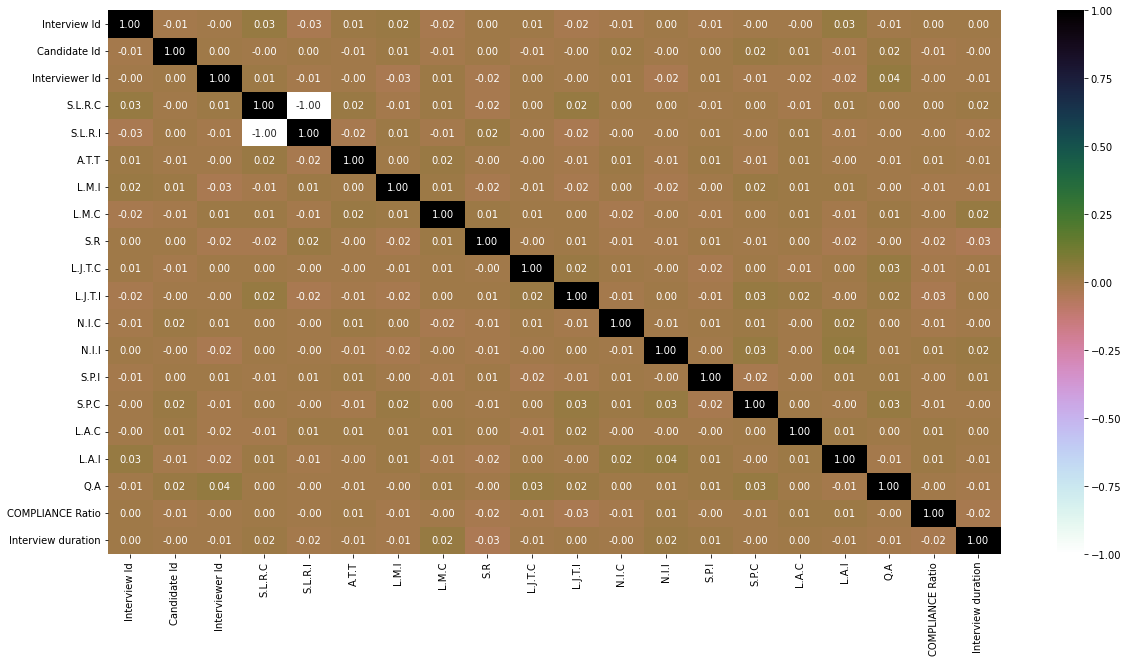

In [46]:
#Plotting the correlation of the columns matrix
plt.figure(figsize=(20,10))
sns.heatmap(data_Train.corr(),annot= True,cmap="cubehelix_r",fmt= '.2f')

In [53]:
#  Categorical features Missing values filling with mode

cat_col = ["P.E.I","P.E.C","Interviewer Intro","Opp to ask","Status"]
data_Train[cat_col] = data_Train[cat_col].fillna(data_Train[cat_col].mode().iloc[0])

Number of Consider:  2315
Number of May Consider :  1890
Number of Not Consider :  1595


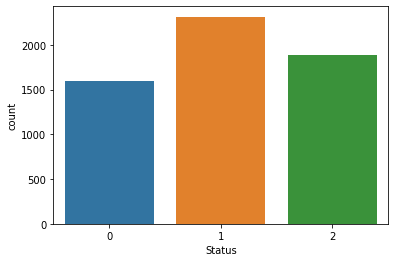

In [54]:
# checking the class distribution of the target
ax = sns.countplot(data_Train['Status'],label="Count")   
Consider,MayConsider,NotConsider = data_Train['Status'].value_counts()
print('Number of Consider: ',Consider)
print('Number of May Consider : ',MayConsider)
print('Number of Not Consider : ',NotConsider)


In [55]:
# Manually doing the label encoding for Target variable

data_Train["Status"] = data_Train["Status"].replace("Consider",1)
data_Train["Status"] = data_Train["Status"].replace("Not Consider",0)
data_Train["Status"] = data_Train["Status"].replace("May Consider",2)

In [56]:
# Making the copy the DataFrame

data_Train1 = data_Train.copy(deep=True)

In [57]:
data_Train1.columns

Index(['Interview Id', 'Candidate Id', 'Interviewer Id', 'Profile', 'S.L.R.C',
       'A.T.T', 'L.M.I', 'L.M.C', 'S.R', 'L.J.T.C', 'L.J.T.I', 'N.I.C',
       'N.I.I', 'S.P.I', 'S.P.C', 'L.A.C', 'L.A.I', 'Q.A', 'P.E.I', 'P.E.C',
       'COMPLIANCE Ratio', 'Interview duration', 'Interviewer Intro',
       'Candidate into', 'Opp to ask', 'Status'],
      dtype='object')

In [58]:
col=['Interview Id','Candidate Id','Interviewer Id','L.J.T.C','L.J.T.I',
   'N.I.C','L.A.C','S.P.I']
data_Train1=data_Train1.drop(data_Train1[col],axis=1)

In [59]:
data_Train[data_Train.columns[1:]].corr()['Status'][:]

Candidate Id         -0.020139
Interviewer Id        0.005345
S.L.R.C               0.006637
A.T.T                 0.000321
L.M.I                 0.000111
L.M.C                 0.115884
S.R                  -0.017297
L.J.T.C              -0.313498
L.J.T.I              -0.009897
N.I.C                -0.057882
N.I.I                -0.003444
S.P.I                 0.004663
S.P.C                 0.118261
L.A.C                -0.008573
L.A.I                -0.011159
Q.A                  -0.023300
COMPLIANCE Ratio      0.012429
Interview duration    0.055780
Status                1.000000
Name: Status, dtype: float64

In [60]:
# One-Hot-Encoding For categorical features

data_Train1  = pd.get_dummies(data_Train1,drop_first=True)
data_Train1.head()

,S.L.R.C,A.T.T,L.M.I,L.M.C,S.R,N.I.I,S.P.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration,Status,Profile_Data Scientist,Profile_Developer,Profile_HR,Profile_Marketing,Profile_Product Manager,Profile_Program Manager,Profile_QA Automation,Profile_QA Manual,Profile_Sales,P.E.I_Neutral,P.E.I_Positive,P.E.C_Neutral,P.E.C_Positive,Interviewer Intro_Yes,Candidate into_Yes,Opp to ask_Yes
0,0.98,53,88,93,32,66,47,15,6,98,37,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1
1,0.67,51,53,44,36,62,52,15,4,54,33,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
2,0.81,60,77,75,54,14,34,7,3,31,58,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
3,0.69,93,42,103,49,55,75,10,7,24,35,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
4,0.57,44,44,119,66,32,74,7,3,73,60,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0


In [61]:
# Splitting the data into X for  featues and Y for Target variable

x = data_Train1.drop(columns="Status",axis=1)
y = data_Train1["Status"]

In [62]:
# MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(x)
X = scaler.fit_transform(x)

In [63]:
# split data into train subset and test subset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
print("Shape of is X_train :",X_train.shape)
print("Shape of is X_test :",X_test.shape)
print("Shape of is y_train :",y_train.shape)
print("Shape of is y_test :",y_test.shape)

Shape of is X_train : (4640, 27)
Shape of is X_test : (1160, 27)
Shape of is y_train : (4640,)
Shape of is y_test : (1160,)


# model Building

In [64]:
#importing LogisticRegression from Sklearn
from sklearn.linear_model import LogisticRegression
Logistic_model = LogisticRegression(random_state=1,penalty='l1',n_jobs=-1,solver='saga')
Logistic_model.fit(X_train, y_train )

LogisticRegression(n_jobs=-1, penalty='l1', random_state=1, solver='saga')

In [65]:
# predict the values

Logisticmodel_Predict = Logistic_model.predict(X_test)

In [66]:
# accuracy measures by classification_report()

from sklearn.metrics import classification_report
print(classification_report(y_test,Logisticmodel_Predict))

              precision    recall  f1-score   support

           0       0.42      0.42      0.42       308
           1       0.47      0.68      0.56       480
           2       0.23      0.10      0.14       372

    accuracy                           0.42      1160
   macro avg       0.37      0.40      0.37      1160
weighted avg       0.38      0.42      0.39      1160



In [67]:
# Printing the scores of precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

print('Precision:%.3f' % precision_score(y_test, Logisticmodel_Predict,average='weighted'))
print('Recall:   %.3f' % recall_score(y_test, Logisticmodel_Predict,average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_test, Logisticmodel_Predict))
print('F1 Score: %.3f' % f1_score(y_test, Logisticmodel_Predict,average='weighted'))

Precision:0.380
Recall:   0.424
Accuracy: 0.424
F1 Score: 0.386


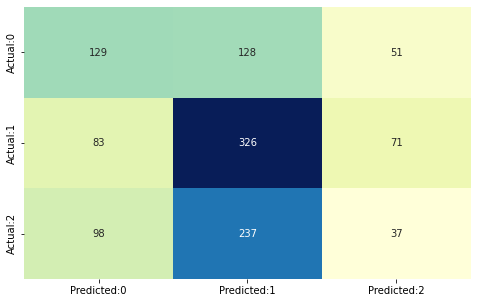

In [68]:
# compute the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Logisticmodel_Predict) 
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = RandomForestClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [70]:
final_model = grid_search.best_estimator_
final_model

RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features='log2', random_state=1024)

In [71]:
from sklearn.ensemble import RandomForestClassifier
Random_forest=RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='sqrt', max_leaf_nodes=25,
                       min_samples_leaf=30, random_state=1024)

Random_forest.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_leaf_nodes=25, min_samples_leaf=30,
                       random_state=1024)

In [72]:
RandomForest_predict=Random_forest.predict(X_test)
print(pd.DataFrame({'Actual':y_test,'Predicted':RandomForest_predict}).head(10))

      Actual  Predicted
1822       0          1
1998       2          1
5125       2          1
808        0          0
4428       1          0
3672       1          1
3375       0          0
3695       2          1
3211       2          1
623        0          1


In [73]:
print(classification_report(y_test,RandomForest_predict))

              precision    recall  f1-score   support

           0       0.41      0.34      0.37       308
           1       0.47      0.85      0.61       480
           2       0.26      0.02      0.04       372

    accuracy                           0.45      1160
   macro avg       0.38      0.41      0.34      1160
weighted avg       0.39      0.45      0.36      1160



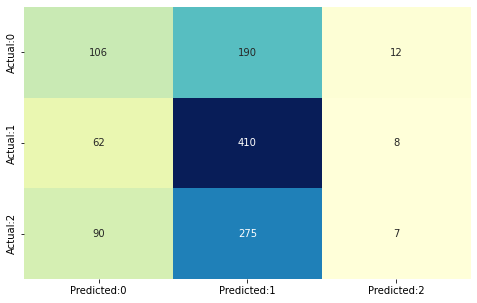

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,RandomForest_predict) 
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

## Future data

In [192]:
# import test data for predicting the values 

data_Test = pd.read_csv("test_IA_-_test.csv")
data_Test.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
0,702127796635,2.381365e+09,229,Product Manager,0.52,0.48,103,53,77,30,26.0,287,8,22,69.0,88,5,19.0,4.0,Positive,Negative,24.0,49,Yes,Yes,Yes
1,613490569071,8.428514e+08,194,Product Manager,0.87,0.13,54,57,57,68,179.0,253,62,40,47.0,81,1,9.0,7.0,Positive,Neutral,99.0,24,No,Yes,Yes
2,759998772623,7.681665e+09,266,QA Automation,0.60,0.40,50,117,93,36,137.0,31,40,52,57.0,13,7,15.0,3.0,Negative,Positive,16.0,16,Yes,No,Yes
3,391760082113,6.627808e+09,256,HR,0.52,0.48,102,114,66,31,176.0,242,69,66,59.0,10,10,4.0,6.0,Negative,Neutral,66.0,40,No,No,Yes
4,941599210196,1.148634e+09,267,HR,0.59,0.41,96,73,115,23,218.0,215,69,42,74.0,20,10,4.0,6.0,Positive,Positive,47.0,38,No,Yes,Yes


In [193]:
# Information of the test dataset
data_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        1200 non-null   int64  
 1   Candidate Id        1200 non-null   float64
 2   Interviewer Id      1200 non-null   int64  
 3   Profile             1200 non-null   object 
 4   S.L.R.C             1200 non-null   float64
 5   S.L.R.I             1199 non-null   float64
 6   A.T.T               1200 non-null   int64  
 7   L.M.I               1200 non-null   int64  
 8   L.M.C               1200 non-null   int64  
 9   S.R                 1200 non-null   int64  
 10  L.J.T.C             1199 non-null   float64
 11  L.J.T.I             1200 non-null   int64  
 12  N.I.C               1200 non-null   int64  
 13  N.I.I               1200 non-null   int64  
 14  S.P.I               1198 non-null   float64
 15  S.P.C               1200 non-null   int64  
 16  L.A.C 

In [194]:
#checking the NAN values 

data_Test.isnull().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               1
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               1
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 2
S.P.C                 0
L.A.C                 0
L.A.I                 1
Q.A                   1
P.E.I                 2
P.E.C                 2
COMPLIANCE Ratio      1
Interview duration    0
Interviewer Intro     2
Candidate into        0
Opp to ask            0
dtype: int64

<AxesSubplot:>

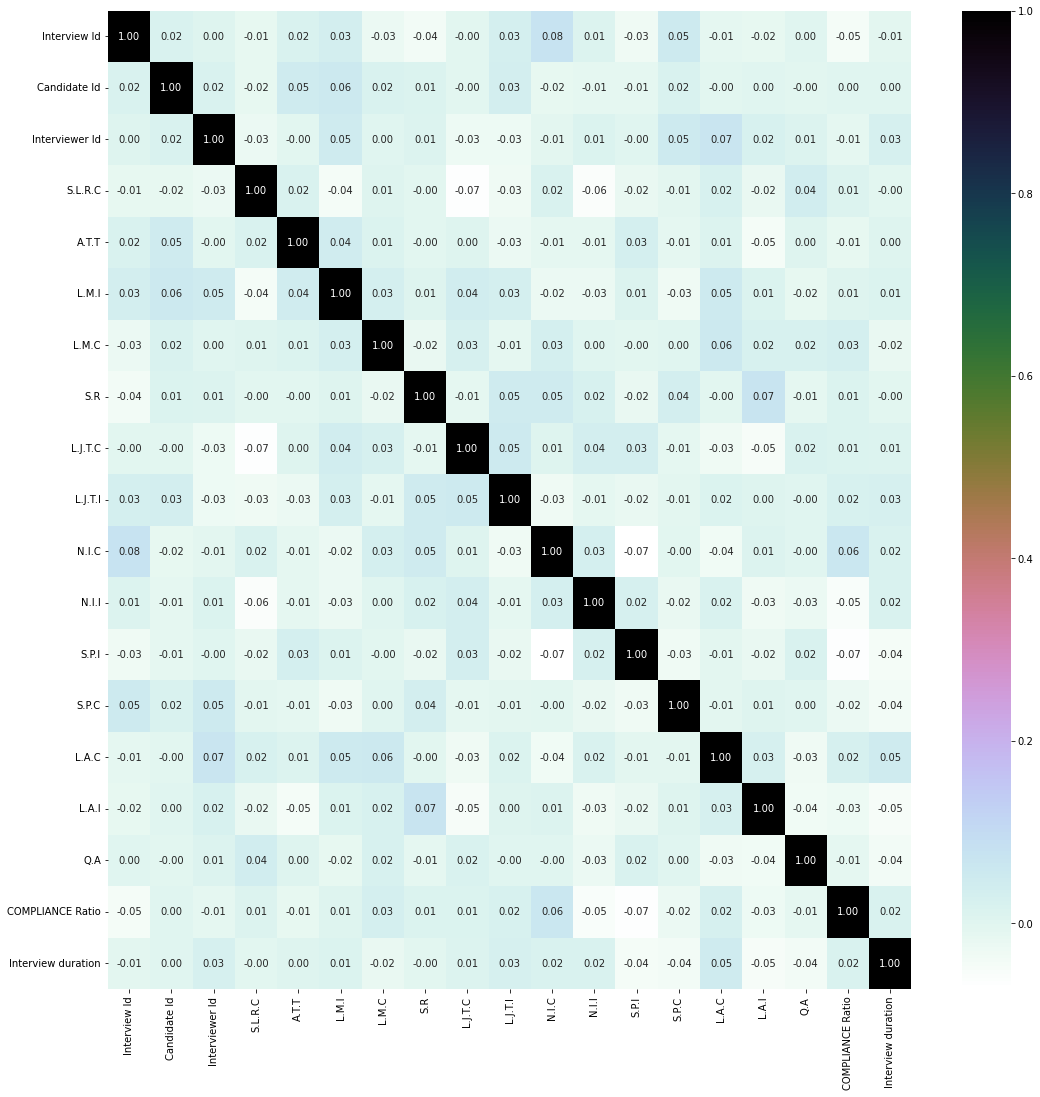

In [282]:
#plotting the correlation of the features using heatmap

plt.figure(figsize=(18,18))
sns.heatmap(data_Test.corr(),annot=True,cmap="cubehelix_r",fmt=".2f")

In [196]:
# Removing the Highly negatively Correlated 
data_Test = data_Test.drop("S.L.R.I",axis=1)

In [197]:
# Missing values treating with numerical for median and categorigal features for mode 
cat_col = ["P.E.I","P.E.C","Interviewer Intro"]
num_col = ["L.J.T.C","S.P.I","L.A.I","Q.A","COMPLIANCE Ratio"]
data_Test[num_col] = data_Test[num_col].fillna(data_Test[num_col].median())
data_Test[cat_col] = data_Test[cat_col].fillna(data_Test[cat_col].mode().iloc[0])

In [198]:
# strong the Interview Id for futur use 
ID = data_Test["Interview Id"]
ID

0       702127796635
1       613490569071
2       759998772623
3       391760082113
4       941599210196
            ...     
1195    256033687434
1196    627337316047
1197     75547031851
1198    173914777164
1199    480519602140
Name: Interview Id, Length: 1200, dtype: int64

In [199]:
# One-Hot-Encoding for categorical Features
data_Test1  = data_Test.copy(deep = True)
data_Test1  = pd.get_dummies(data_Test1,drop_first=True)
data_Test1.head()

,Interview Id,Candidate Id,Interviewer Id,S.L.R.C,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration,Profile_Data Scientist,Profile_Developer,Profile_HR,Profile_Marketing,Profile_Product Manager,Profile_Program Manager,Profile_QA Automation,Profile_QA Manual,Profile_Sales,P.E.I_Neutral,P.E.I_Positive,P.E.C_Neutral,P.E.C_Positive,Interviewer Intro_Yes,Candidate into_Yes,Opp to ask_Yes
0,702127796635,2.381365e+09,229,0.52,103,53,77,30,26.0,287,8,22,69.0,88,5,19.0,4.0,24.0,49,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1
1,613490569071,8.428514e+08,194,0.87,54,57,57,68,179.0,253,62,40,47.0,81,1,9.0,7.0,99.0,24,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1
2,759998772623,7.681665e+09,266,0.60,50,117,93,36,137.0,31,40,52,57.0,13,7,15.0,3.0,16.0,16,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1
3,391760082113,6.627808e+09,256,0.52,102,114,66,31,176.0,242,69,66,59.0,10,10,4.0,6.0,66.0,40,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,941599210196,1.148634e+09,267,0.59,96,73,115,23,218.0,215,69,42,74.0,20,10,4.0,6.0,47.0,38,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1


In [200]:
# MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(data_Test1)
data_Test1 = scaler.fit_transform(data_Test1)

In [201]:
#Predict the data_Test1 by using the xgb_model Model

Test_predict = Logistic_model.predict(data_Test1)
Test_predict

array([1, 2, 2, ..., 0, 2, 2], dtype=int64)

In [202]:
#creating the dataframe for predicted values
df = pd.DataFrame(Test_predict)
df.rename({0:"Status"},inplace =True,axis=1)

In [203]:
# joining the predicted values with Interview Id
dataframe  = pd.DataFrame()
dataframe = pd.concat([ID.reset_index(drop=True),df.reset_index(drop=True)],axis=1)
dataframe

,Interview Id,Status
0,702127796635,1
1,613490569071,2
2,759998772623,2
3,391760082113,0
4,941599210196,0
...,...,...
1195,256033687434,0
1196,627337316047,1
1197,75547031851,0
1198,173914777164,2


In [204]:
# renaming the columns name
dataframe.rename(columns={"Interview Id":"interview id ","Status":"Status"})

,interview id,Status
0,702127796635,1
1,613490569071,2
2,759998772623,2
3,391760082113,0
4,941599210196,0
...,...,...
1195,256033687434,0
1196,627337316047,1
1197,75547031851,0
1198,173914777164,2


In [205]:
# changing the target into encoding  as given in the sampple format

dataframe["Status"] = dataframe["Status"].replace(0,"Not Consider")
dataframe["Status"] = dataframe["Status"].replace(1,"Consider")
dataframe["Status"] = dataframe["Status"].replace(2,"May Consider")

In [206]:
#save the file into csv file
dataframe.to_csv("Test_data_prediction.csv",index=False)